In [1]:
#1
#DFS 
graph = {'0':['1', '2'],'1':['2'],'2':['3'],'3':['1','2']}
visited=set()
def dfs(visited,graph,root):
    if root not in visited:
        print(root)
        visited.add(root)
        for neighbour in graph[root]:
            dfs(visited,graph,neighbour)
dfs(visited,graph,'0') 
#BFS
import collections 
# BFS algorithm
def bfs(graph, root):
    visited, queue = set(),collections.deque([root])
    visited.add(root)
    while queue:
        # Dequeue a vertex from queue
        vertex = queue.popleft()
        print(str(vertex) + " ", end=" ")
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour) 
if __name__ == '__main__':
    graph = {0: [1, 2], 1: [2], 2: [3], 3: [1, 2]}
    print("Following is Breadth First Traversal: ")
    bfs(graph,0) 


0
1
2
3
Following is Breadth First Traversal: 
0  1  2  3  

In [2]:
#2
#A* Algorithm
Graph_nodes = {
    'A': [('B', 6), ('F', 3)],
    'B': [('C', 3),('D', 2)],
    'C': [('D', 1),('E', 5)],
    'D': [('C', 1),('E', 8)],
    'E': [('I', 5),('J', 5)],
    'F': [('G', 1),('H', 7)],
    'G': [('I', 3)],
    'H': [('I', 2)],
    'I': [('E', 5),('J', 3)],
}
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
def h(n):
    H_dist = {
        'A': 10,
        'B': 8,
        'C': 5,
        'D': 7,
        'E': 3,
        'F': 6,
        'G': 5,
        'H': 3,
        'I': 1,
        'J': 0,
    }
    return H_dist[n] 
def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()
    g = {} #store distance from starting node
    parents = {}# parents contains an adjacency map of all nodes #ditance of starting node from itself is zero
    g[start_node] = 0    #start_node is root node i.e it has no parent nodes #so start_node is set to its own parent node
    parents[start_node] = start_node
    while len(open_set) > 0:
        n = None #node with lowest f() is found
        for v in open_set:
            if n == None or g[v] + h(v) < g[n] + h(n):
                n = v
        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n): #nodes 'm' not in first and last set are added to first #n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight  #for each node m,compare its distance from start i.e g(m) to the #from start through n node
                else:
                    if g[m] > g[n] + weight: #update g(m)
                        g[m] = g[n] + weight #change parent of m to n
                        parents[m] = n  #if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)
        if n == None:
            print('Path does not exist!')
            return None # if the current node is the stop_node # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()
            print('Path found: {}'.format(path))
            return path # remove n from the open_list, and add it to closed_list # because all of his neighbors were inspected
        open_set.remove(n)
        closed_set.add(n)
    print('Path does not exist!')
    return None
aStarAlgo('A', 'J') 


Path found: ['A', 'F', 'G', 'I', 'J']


['A', 'F', 'G', 'I', 'J']

In [3]:
#3
#candidate algorithm
import csv
with open('trainingexamples.csv') as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    # Initialize specific and general hypotheses
    specific = None
    for row in data:
        if row[-1] == "Yes":
            specific = row[:-1]
            break
    if specific is None:
        raise ValueError("No positive example found in the data.")

    general = [['?' for _ in range(len(specific))] for _ in range(len(specific))]

    # Process each example
    step = 1
    for row in data:
        if row[-1] == "Yes":
            for j in range(len(specific)):
                if row[j] != specific[j]:
                    specific[j] = "?"
                    for g in general:
                        g[j] = '?'
        elif row[-1] == "No":
            for j in range(len(specific)):
                if row[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep {} of Candidate Elimination Algorithm".format(step))
        step += 1
        print("Specific Hypothesis:", specific)
        print("General Hypothesis:", general)

    # Remove overly general hypotheses
    gh = [h for h in general if any(attr != '?' for attr in h)]

    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)



Step 1 of Candidate Elimination Algorithm
Specific Hypothesis: ['Sunny', 'Warm', 'Normal', 'Strong', 'warm', 'Same']
General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
Specific Hypothesis: ['Sunny', 'Warm', 'Normal', 'Strong', 'warm', 'Same']
General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
Specific Hypothesis: ['Sunny', 'Warm', '?', 'Strong', 'warm', 'Same']
General Hypothesis: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 4 of C

In [4]:
#3.5
#Candidate elinination
import numpy as np
import pandas as pd
# Load data
data = pd.read_csv('trainingexamples.csv')
concepts = np.array(data.iloc[:, :-1])
target = np.array(data.iloc[:, -1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        elif target[i] == "no":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'# Remove fully generic hypotheses
    general_h = [h for h in general_h if h != ['?', '?', '?', '?', '?', '?']]
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")


Final Specific_h: 
['Sunny' 'Warm' 'Normal' 'Strong' 'warm' 'Same']
Final General_h: 
[]


In [5]:
#4
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
# Load Iris dataset
iris = datasets.load_iris()
print("Iris Data set loaded...")
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.1, random_state=0)
# Display labels
for i in range(len(iris.target_names)):
    print("Label", i, "-", str(iris.target_names[i]))
# Initialize KNN classifier
classifier = KNeighborsClassifier(n_neighbors=3)
# Train the classifier
classifier.fit(x_train, y_train)
# Predict using the classifier
y_pred = classifier.predict(x_test)
# Print results
print("Results of Classification using K-nn with K=3")
for r in range(0, len(x_test)):
    print("Sample:", str(x_test[r]), "Actual-label:", str(y_test[r]),"Predicted-label:", str(y_pred[r]))
# Calculate and print classification accuracy
    print("Classification Accuracy:", classifier.score(x_test, y_test))

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=3
Sample: [5.8 2.8 5.1 2.4] Actual-label: 2 Predicted-label: 2
Classification Accuracy: 1.0
Sample: [6.  2.2 4.  1. ] Actual-label: 1 Predicted-label: 1
Classification Accuracy: 1.0
Sample: [5.5 4.2 1.4 0.2] Actual-label: 0 Predicted-label: 0
Classification Accuracy: 1.0
Sample: [7.3 2.9 6.3 1.8] Actual-label: 2 Predicted-label: 2
Classification Accuracy: 1.0
Sample: [5.  3.4 1.5 0.2] Actual-label: 0 Predicted-label: 0
Classification Accuracy: 1.0
Sample: [6.3 3.3 6.  2.5] Actual-label: 2 Predicted-label: 2
Classification Accuracy: 1.0
Sample: [5.  3.5 1.3 0.3] Actual-label: 0 Predicted-label: 0
Classification Accuracy: 1.0
Sample: [6.7 3.1 4.7 1.5] Actual-label: 1 Predicted-label: 1
Classification Accuracy: 1.0
Sample: [6.8 2.8 4.8 1.4] Actual-label: 1 Predicted-label: 1
Classification Accuracy: 1.0
Sample: [6.1 2.8 4.  1.3] Actual-label: 1 Predicted-label: 1
C

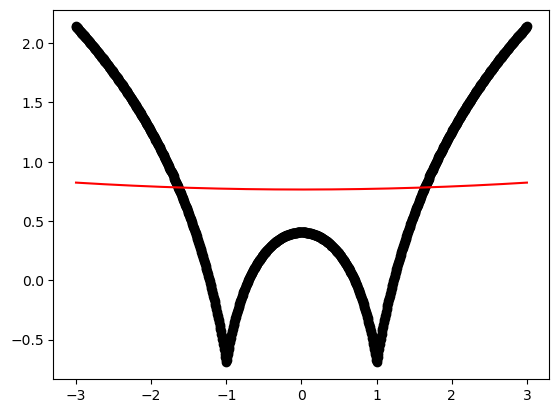

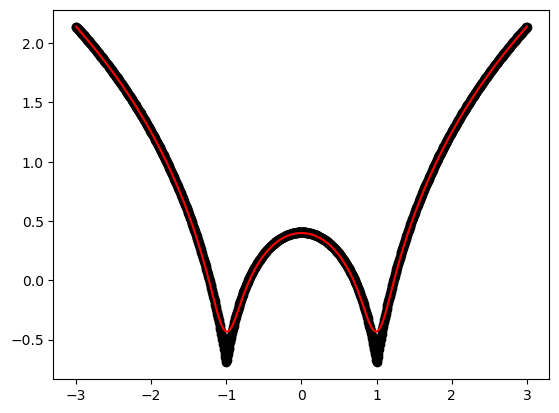

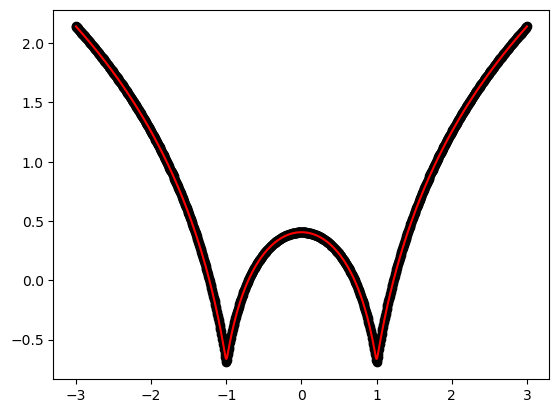

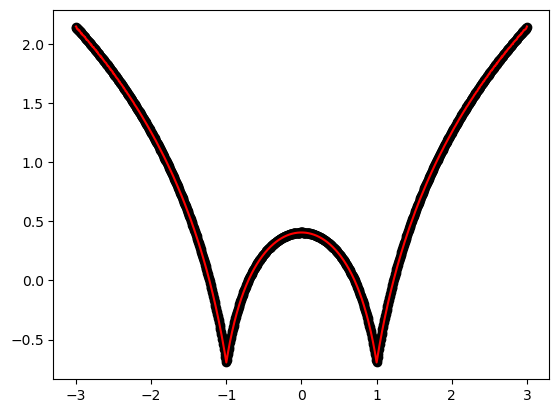

In [6]:
#5
#local Regression
import numpy as np
import matplotlib.pyplot as plt
def local_regression(x0, X, Y, tau):
    x0 = [1, x0]
    X = [[1, i] for i in X]
    X = np.asarray(X)
    xw = (X.T) * np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau**2))
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    beta=beta @ x0
    return beta
def draw(tau):
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.plot(X, Y, 'o', color='black')
    plt.plot(domain, prediction, color='red')
    plt.show()
X = np.linspace(-3, 3, num=1000)
domain = X
Y = np.log(np.abs(X ** 2 - 1) + .5)
draw(10)
draw(0.1)
draw(0.01)
draw(0.001)


In [7]:
#6
#import necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
# Load Data from CSV
data = pd.read_csv('tennis.csv')
print("The first 5 Values of data is :\n", data.head())
# obtain train data and train output
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())
y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())


The first 5 Values of data is :
     Outlook Temperature Humidity   Windy PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes

The First 5 values of the train data is
     Outlook Temperature Humidity   Windy
0     Sunny         Hot     High    Weak
1     Sunny         Hot     High  Strong
2  Overcast         Hot     High    Weak
3      Rain        Mild     High    Weak
4      Rain        Cool   Normal    Weak

The First 5 values of train output is
 0     No
1     No
2    Yes
3    Yes
4    Yes
Name: PlayTennis, dtype: object


In [9]:
#6.5
#convert them in numbers
import pandas as pd
LE = LabelEncoder()
X.Outlook = LE.fit_transform(X.Outlook)
X.Temperature = LE.fit_transform(X.Temperature)
X.Humidity = LE.fit_transform(X.Humidity)
X.Windy = LE.fit_transform(X.Windy)
print("\nNow the Train output is\n", X.head())
y = LE.fit_transform(y)
print("\n Now the Train output is\n",y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print("Accuracy is:", accuracy_score(classifier.predict(X_test), y_test))


Now the Train output is
    Outlook  Temperature  Humidity  Windy
0        2            1         0      1
1        2            1         0      0
2        0            1         0      1
3        1            2         0      1
4        1            0         1      1

 Now the Train output is
 [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Accuracy is: 0.6666666666666666


C:\Users\ARJUN\AppData\Local\Temp\ipykernel_3784\4093642018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Outlook = LE.fit_transform(X.Outlook)
C:\Users\ARJUN\AppData\Local\Temp\ipykernel_3784\4093642018.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Temperature = LE.fit_transform(X.Temperature)
C:\Users\ARJUN\AppData\Local\Temp\ipykernel_3784\4093642018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [10]:
#7
#Artificial Neural Networks using Backpropogation Algorithm
import numpy as np 
x = np.array(([2,9],[1,5],[3,6]),dtype=float) 
y = np.array(([92],[86],[89]),dtype=float) 
x = x/np.amax(x,axis=0) 
y = y/100
#Sigmoid Curve
def sigmoid (x):
    return 1/(1+np.exp(-x)) 
#Derivative of sigmoid function
def derivatives_sigmoid(x):
    return x*(1-x) 
#Variable initialization
epoch = 5000
lr = 0.1
inputlayer_neurons = 2
hiddenlayer_neurons = 3
output_neurons = 1
wh = np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) 
bh = np.random.uniform(size=(1,hiddenlayer_neurons)) 
wout = np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) 
bout = np.random.uniform(size=(1,output_neurons)) 
#draws a random range of numbers uniformly of dim x*y
for i in range (epoch): 
#forward propogation
    hinp1 = np.dot(x,wh)
    hinp = hinp1 + bh 
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act,wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)
    #Backpropogation
    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * output
    EH = d_output.dot (wout.T)
    #how much hidden layer wts contributed to error
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    #dotproduct of nextLayererror and currentLayerop
    wout += hlayer_act.T.dot(d_output) * lr
    wh += x.T.dot(d_hiddenlayer) * lr 
print("Input: \n" + str(x)) 
print("Actual Output: \n" + str(y)) 
print("Predictd Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predictd Output: 
 [[0.89656808]
 [0.87871827]
 [0.89704343]]


In [15]:
#Candidate Elimination
import csv

with open("trainingexamples.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    specific = data[0][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]

    for i in data:
        if i[-1] == "Yes":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"

        elif i[-1] == "No":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)

    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)


Step 1 of Candidate Elimination Algorithm
['Sky', 'Air Temp', 'Humidity', 'Wing', 'Water', 'Forecast']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
['?', '?', '?', '?', '?', '?']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
['?', '?', '?', '?', '?', '?']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 4 of Candidate Elimination Algorithm
['?', '?', '?', '?', '?', '?']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']